# Hypothesis Testing

Used "Statistical Methods for Machine Learning" by Jason Brownlee as reference.


## Statistical Hypothesis Testing

Videos: 
1. https://youtu.be/0oc49DyA3hU
2. https://youtu.be/5koKb5B_YWo

We can interpret data by assuming a
specific structured outcome and use statistical methods to confirm or reject the assumption.
The assumption is called a <b>hypothesis</b> and the statistical tests used for this purpose are called
<b>statistical hypothesis tests</b>.

In statistics, a hypothesis test calculates some quantity under a
given assumption. The result of the test allows us to interpret whether the assumption holds or
whether the assumption has been violated. Two concrete examples that we will use a lot in
machine learning are:
- A test that assumes that data has a normal distribution.
- A test that assumes that two samples were drawn from the same underlying population
distribution.

The assumption of a statistical test is called the <b>null hypothesis</b>, or hypothesis zero (H0 for
short). It is often called the default assumption, or the assumption that nothing has changed.
A violation of the test's assumption is often called the first hypothesis, hypothesis one or <b>H1</b> for
short.

- Hypothesis 0 (H0): Assumption of the test fails to be rejected.
- Hypothesis 1 (H1): Assumption of the test does not hold and is rejected at some level
of significance.

## P- value:

Video: https://youtu.be/vemZtEM63GY

A p value is used in hypothesis testing to help you support or reject the null hypothesis. The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

For example, a p value of 0.0254 is 2.54%. This means there is a 2.54% chance your results could be random (i.e. happened by chance). That’s pretty tiny. On the other hand, a large p-value of .9(90%) means your results have a 90% probability of being completely random and not due to anything in your experiment. Therefore, the smaller the p-value, the more important (“significant“) your results.

## Type 1 and Type 2 Errors:

A <b>type I</b> error (false-positive) occurs if an investigator <b>rejects a null</b> hypothesis that is actually true in the population; a <b>type II</b> error (false-negative) occurs if the investigator <b>fails to reject a null</b> hypothesis that is actually false in the population.

<img src="https://www.simplypsychology.org/type-1-and-2-errors.jpg" width=500>

<img src="https://www.dummies.com/wp-content/uploads/436264.image0.jpg">

## Statistical Distributions

### Density Functions

Video: https://youtu.be/ce3kUWkY9IY

Density functions
are functions that describe how the proportion of data or likelihood of the proportion of
observations change over the range of the distribution. Two types of density functions are
probability density functions and cumulative density functions.
- Probability Density function: calculates the probability of observing a given value.
- Cumulative Density function: calculates the probability of an observation equal or
less than a value.

In [10]:
from scipy.stats import norm 
import numpy as np
import plotly.express as px
from plotly import graph_objects as go

# define the distribution parameters
sample_space = np.arange(-5, 5, 0.001)
mean = 0.0
stdev = 1.0

# calculate the pdf
pdf = norm.pdf(sample_space, mean, stdev)

px.line(x=sample_space,y= pdf)

In [11]:
from scipy.stats import norm 
import numpy as np
import plotly.express as px

# define the distribution parameters
sample_space = np.arange(-5, 5, 0.001)
mean = 0.0
stdev = 1.0

# calculate the cdf
pdf = norm.cdf(sample_space, mean, stdev)

px.line(x=sample_space,y= pdf)

### Student's t-Distribution

Video: https://youtu.be/Uv6nGIgZMVw

The T distribution (also called Student’s T Distribution) is a family of distributions that look almost identical to the normal distribution curve, only a bit shorter and fatter. The t distribution is used instead of the normal distribution when you have small samples. The larger the sample size, the more the t distribution looks like the normal distribution.

The distribution can be described using a single parameter i.e. the number of degrees of freedom: denoted with the lowercase Greek letter nu , denotes
the number degrees of freedom.

In practice, if you require a
value from a t-distribution in the calculation of a statistic, then the number of degrees of freedom
will likely be n - 1, where n is the size of your sample drawn from a Gaussian distribution.

In [18]:
#below creates a t-distribution using the sample space from -5 to 5 and (10,000 - 1) degrees of freedom.
from scipy.stats import t

sample_size = np.arange(-5,5,0.001)
dof=len(sample_size)-1

pdf=t.pdf(sample_size,dof)

px.line(x=sample_space,y= pdf)

In [22]:
#let's compare the gaussian distribution plotted earlier with the t distribution
t_pdf=t.pdf(sample_size,dof)
norm_pdf = norm.pdf(sample_space, mean, stdev)

fig=go.Figure()
fig.add_trace(go.Scatter(x=sample_size,y=t_pdf,name='T distribution'))
fig.add_trace(go.Scatter(x=sample_size,y=norm_pdf,name='Normal distribution'))
fig.show()

In the above graph, the T and Normal distribution are so similar that you have to zoom in to see the difference

### Chi squared distribution

Video: https://youtu.be/hcDb12fsbBU

Let’s say you have a random sample taken from a normal distribution. The chi square distribution is the distribution of the sum of these random samples squared . The degrees of freedom (k) are equal to the number of samples being summed. For example, if you have taken 10 samples from the normal distribution, then df = 10. The degrees of freedom in a chi square distribution is also its mean. In this example, the mean of this particular distribution will be 10. Chi square distributions are always right skewed. However, the greater the degrees of freedom, the more the chi square distribution looks like a normal distribution.

In [28]:
"""
Below calculates the Chi-Squared distribution for a
sample space between 0 and 50 with 20 degrees of freedom. Recall that the sum squared values
must be positive, hence the need for a positive sample space.
"""
from scipy.stats import chi2

sample_space = np.arange(0, 50, 0.01)
dof = 20

pdf=chi2.pdf(sample_space,dof)

px.line(x=sample_space,y= pdf)

## Critical Values

### Why Do We Need Critical Values?

Many statistical hypothesis tests return a p-value that is used to interpret the outcome of the
test. Some tests do not return a p-value, requiring an alternative method for interpreting the
calculated test statistic directly. A statistic calculated by a statistical hypothesis test can be
interpreted using critical values from the distribution of the test statistic. Some examples of statistical hypothesis tests and their distributions from which critical values can be calculated
are as follows:
- Z-Test: Gaussian distribution.
- Student's t-Test: Student's t-distribution.
- Chi-Squared Test: Chi-Squared distribution.
- ANOVA: F-distribution.

### What is a critical value?

Source: https://www.statisticshowto.com/probability-and-statistics/find-critical-values/

A critical value is a line on a graph that splits the graph into sections. One or two of the sections is the “rejection region“; if your test value falls into that region, then you reject the null hypothesis.

<img src="https://www.statisticshowto.com/wp-content/uploads/2016/11/critical-values.png">

Calculated critical values are used as a threshold for interpreting the result of a statistical test.
The observation values in the population beyond the critical value are often called the <i>critical
region or the region of rejection.</i>

### One vs Two Tailed Test

Video: https://youtu.be/XHPIEp-3yC0

#### One-Tailed Test

A one-tailed test has a single critical value, such as on the left or the right of the distribution.We can summarize this interpretation as
follows:
- Test Statistic < Critical Value: not significant result, fail to reject null hypothesis
(H0).
- Test Statistic >= Critical Value: significant result, reject null hypothesis (H0).

#### Two-Tailed Test
A two-tailed test has two critical values, one on each side of the distribution, which is often
assumed to be symmetrical (e.g. Gaussian and Student-t distributions.). When using a twotailed
test, a significance level (or alpha) used in the calculation of the critical values must
be divided by 2. The critical value will then use a portion of this alpha on each side of the
distribution. To make this concrete, consider an alpha of 5%. This would be split to give two
alpha values of 2.5% on either side of the distribution with an acceptance area in the middle of
the distribution of 95%.

We can summarize this
interpretation as follows:
- Lower CR < Test Statistic > Upper CR: not significant result, fail to reject null hypothesis
(H0).
- Test Statistic <= Lower CR OR Test Statistic >= Upper CR: significant result, reject
null hypothesis (H0).

### How to calculate Critical Values

In order to calculate a critical value, we require a function that, given a probability (or
significance), will return the observation value from the distribution. Specifically, we require
the inverse of the cumulative density function, where given a probability, we are given the
observation value that is less than or equal to the probability. This is called the percent point
function (PPF), or more generally the quantile function.

### How to calculate critical values for the Gaussian, Student's t, and Chi-Squared distributions.

#### Gaussian Critical values

Below calculates the percent point function for 95% on the standard Gaussian
distribution.

In [31]:
from scipy.stats import norm

#define the probability
p=0.95

#get the ppf(which is basically inverse of cdf) given the probability
# retrieve value <= probability
value=norm.ppf(p)
print(value)

#confirm by getting cdf 
print(norm.cdf(value)) #should return 0.95

1.6448536269514722
0.95


#### Student's t distribution

Below code calculates the percentage point function for 95% on the standard Student's
t-distribution with 10 degrees of freedom.

In [36]:
from scipy.stats import t

#define the probability
p=0.95
dof=20

#get the ppf(which is basically inverse of cdf) given the probability
# retrieve value <= probability
value=t.ppf(p,dof)
print(value)

#confirm by getting cdf 
print(t.cdf(value,dof)) #should return 0.95

1.7247182429207857
0.9499999999999998


#### Chi-Squared Critical Values

The example below calculates the percentage point function for 95% on the standard Chi-Squared
distribution with 10 degrees of freedom.

In [39]:
from scipy.stats import chi2

#define the probability
p=0.95
dof=10

#get the ppf(which is basically inverse of cdf) given the probability
# retrieve value <= probability
value=chi2.ppf(p,dof)
print(value)

#confirm by getting cdf 
print(chi2.cdf(value,dof)) #should return 0.95

18.307038053275146
0.95


Running the example first calculates the value of 18.3 or less that covers 95% of the
observations from the distribution. The probability of this observation is confirmed by using it
as input to the CDF.

### Covariance

Video: https://youtu.be/qtaqvPAeEJY
<img src="https://1utysa49sprc1qb8aw184c71-wpengine.netdna-ssl.com//wp-content/uploads/2019/04/covariance-formula-surveygizmo-blog.png" width=280>

It is calculated as the average of the product between the values
from each sample, where the values haven been centered (had their mean subtracted).

The sign of the covariance can be interpreted as
whether the two variables change in the same direction (positive) or change in dierent directions
(negative). The magnitude of the covariance is not easily interpreted. A covariance value of
zero indicates that both variables are completely independent.The diagonal of the matrix contains the covariance between each variable and itself.

In [40]:
# calculate the covariance between two variables
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


The covariance between the two variables
is 389.75. We can see that it is positive, suggesting the variables change in the same direction
as we expect.

Covariance value in itself is difficult to interpret but it is useful in calculating correlations and in other computational settings.

### Correlation

Video: https://youtu.be/xZ_z8KWkhXE

The Pearson's correlation coefficient (named for Karl Pearson) can be used to summarize
the strength of the <b>linear</b> relationship between two data samples.It is the normalization of the covariance between the
two variables to give an interpretable score.The use of mean and standard deviation in the calculation suggests the need for the two
data samples to have a Gaussian or Gaussian-like distribution. 
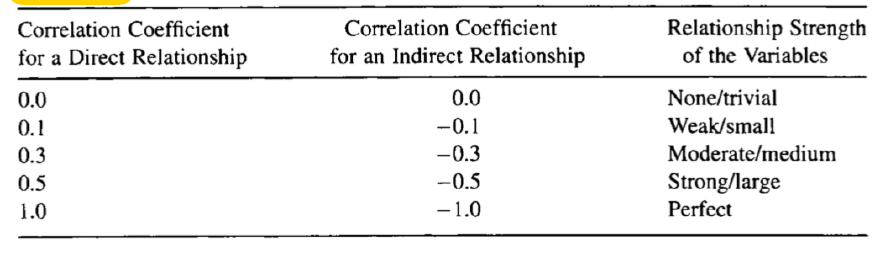

The Pearson's correlation is a statistical hypothesis test that does assume that there is no
relationship between the samples (null hypothesis). The p-value can be interpreted as follows:
- p-value <= alpha: significant result, reject null hypothesis, some relationship (H1).
- p-value > alpha: not significant result, fail to reject null hypothesis, no relationship
(H0).

For correlation, a p-value tells us the probability that randomly drawn dots will result in a similarly strong relationship or stronger thus the smaller the p-value the more confidence we have in the predictions we make with the line.So,confidence in the inferences depends on the amount of data we have collected and the p-value the more data we have the smaller the p-value and the more confidence we have in our inferences.

When there is no relationship that we can represent with a straight line, then correlation = 0.

In [43]:
from scipy.stats import pearsonr

# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

corr,p_value=pearsonr(data1,data2)

print(corr,p_value)
#interpret p value

#smaller p value means higher confidence in our inference

if p_value<=0.05:
    print("Some strong correlation exits so we reject the null hypothesis that there is no relationship between the samples.")
else:
    print("correlation does not exist")

0.8876119085795311 0.0
Some strong correlation exits so we reject the null hypothesis that there is no relationship between the samples.


## Significance Tests (hypothesis testing)

We already discussed what hypothesis testing is but just to recap:

We can interpret data by assuming a specific structured outcome and use statistical methods to confirm or reject the assumption. The assumption is called a hypothesis and the statistical tests used for this purpose are called statistical hypothesis tests.

There are 2 types of hypothesis testing:
1. Parametric significance test
2. Non parametrics significance test

### Parametric significance tests

1. Parametric tests: The Parametric test makes assumptions about distribution, particularly about normal distribution.  When the parametric test meets assumptions, then the parametric test is more powerful than the non-parametric test.  The following are common parametric tests:
- Linear regression analyses
- T-tests and analyses of variance on the difference of means
- Normal curve Z-tests of the differences of means and proportions

### Non-parametric significance tests

2. Non-parametric test: These tests do not assume any assumption about distribution.  The following are common non-parametric tests: Chi-square tests, Fisher’s exact test, runs test, One-Sample Kolmogorov-Smirnov test, Mann-Whitney U test, Wald-Wolfowitz runs, Kruskal-Wallis, Jonckheere-Terpstra tests, McNemar, Wilcoxon sign tests, Friedman, Kendall’s W, and Cochran Q tests.

## T test

### Stundent's t test / Independent samples t-test

One of the most commonly used t-tests is the independent samples t-test. You use
this test when you want to compare the means of two independent samples on a
given variable.

Null hypothesis of the test is that the means of two populations are equal.
A rejection of this hypothesis indicates that there is sufficient evidence that the means of the
populations are different, and in turn that the distributions are not equal.
- Fail to Reject H0: No difference between the sample means.
- Reject H0: Some difference between the sample means.

The independent samples t-test comes in two different forms:

1. the standard Student’s t-test, which assumes that the variance of the two groups are equal.

2. the Welch’s t-test, which is less restrictive compared to the original Student’s test. This is the test where you do not assume that the variance is the same in the two groups, which results in the fractional degrees of freedom.

#### Assumptions

Source: https://www.datanovia.com/en/lessons/t-test-assumptions/independent-t-test-assumptions/

The two-samples independent t-test assume the following characteristics about the data:

- Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
- No significant outliers in the two groups
- Normality. the data for each group should be approximately normally distributed.
- Homogeneity of variances. the variance of the outcome variable should be equal in each group. Recall that, the Welch t-test does not make this assumptions.

In [57]:
"""
The Student's t-test is available in Python via the ttest ind() SciPy.
The test assumes that both samples have the same variance, if this is not the case, a corrected
version of the test can be used by setting the equal var to False.
"""
from scipy.stats import ttest_ind
from scipy.stats import shapiro,levene,ttest_rel

In [55]:
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51

#checking assumptions

"""
We will use Levene test to check if they have same variance
Levene test tests the null hypothesis that all input samples are from populations with equal variances.
small p-value suggests that the populations do not have equal variances.

If variance was different, use Welch test instead
"""
print(data1.var(),data2.var())
test_stat,p_value = levene(data1,data2)

#interpret

if p_value<=0.05:
    print("Reject H0: All input samples are NOT from populations with equal variances")
else:
    print("Fail to Reject H0: All input samples are from populations with equal variances")
    
"""
checking for normality using shapiro test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
here null hypothesis is that data is drawn from normal distribution
"""

test_stat,p_val= shapiro(data1)

#interpret

if p_value<=0.05:
    print("Reject H0: Data 1 is not drawn from normal distribution")
else:
    print("Fail to Reject H0: Data 1 is drawn from normal distribution")
    
test_stat,p_val= shapiro(data2)

#interpret

if p_value<=0.05:
    print("Reject H0: Data 2 is not drawn from normal distribution")
else:
    print("Fail to Reject H0: Data 2 is drawn from normal distribution.")
    

#since all assumptions hold true, perform t test

stat,p_value=ttest_ind(data1,data2)

print(stat,p_value)

#interpret

if p_value<=0.05:
    print("Reject H0: Some difference between the sample means. ")
else:
    print("Fail to Reject H0: No difference between the sample means.")

19.58753807211666 21.71535849407426
Fail to Reject H0: All input samples are from populations with equal variances
Fail to Reject H0: Data 1 is drawn from normal distribution
Fail to Reject H0: Data 2 is drawn from normal distribution.
-2.2620139704259556 0.024782819014639627
Reject H0: Some difference between the sample means. 


The interpretation of the statistic finds that the sample means
are different, with a significance of at least 5%.

### Paired Student's t-Test

Source: https://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/

A dependent samples t-test is also used to compare two means on a single dependent
variable. Unlike the independent samples test, however, a dependent samples t-test
is used to compare the means of a single sample or of two matched or paired samples.

In a paired sample t-test, each subject or entity is measured twice, resulting in pairs of observations. Common applications of the paired sample t-test include case-control studies or repeated-measures designs. Suppose you are interested in evaluating the effectiveness of a company training program. One approach you might consider would be to measure the performance of a sample of employees before and after completing the program, and analyze the differences using a paired sample t-test.

#### Assumptions:
- The dependent variable must be continuous (interval/ratio).
- The observations are independent of one another.
- The dependent variable should be approximately normally distributed.
- The dependent variable should not contain any outliers.

The test is simplified because it no longer assumes that there is variation between the
observations, that observations were made in pairs, before and after a treatment on the same
subject or subjects. The default assumption, or null hypothesis of the test, is that there is no
difference in the means between the samples. The rejection of the null hypothesis indicates that
there is enough evidence that the sample means are different.
- Fail to Reject H0: Paired sample distributions are equal.
- Reject H0: Paired sample distributions are not equal.

In [61]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

rvs1 = norm.rvs(loc=5,scale=10,size=500)
rvs2 = (norm.rvs(loc=5,scale=10,size=500) + norm.rvs(scale=0.2,size=500))

stat,p=ttest_rel(rvs1,rvs2)

if p<=0.05:
    print("Reject H0: There is enough evidence that the sample means are different")
else:
    print("Failt to reject H0: There is no difference in the means between the samples.")

Failt to reject H0: There is no difference in the means between the samples.


## ANOVA

Source: 
- https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/
- https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/

There are sometimes situations where we may have multiple independent data samples. We can
perform the Student's t-test pairwise on each combination of the data samples to get an idea of
which samples have different means but this quite a burdensome. We can use ANOVA instead.

ANOVA is a statistical test that assumes that the mean
across 2 or more groups are equal.

- Fail to Reject H0: All sample distributions are equal.
- Reject H0: One or more sample distributions are not equal.

Basically, you’re testing groups to see if there’s a difference between them. Examples of when you might want to test different groups:

1. A group of psychiatric patients are trying three different therapies: counseling, medication and biofeedback. You want to see if one therapy is better than the others.
2. A manufacturer has two different processes to make light bulbs. They want to know if one process is better than the other.
3. Students from different colleges take the same exam. You want to see if one college outperforms the other.

### Types of ANOVA Tests:

There are two main types: one-way and two-way. Two-way tests can be with or without replication.

<b>What Does “One-Way” or “Two-Way Mean?</b>

One-way or two-way refers to the number of independent variables (IVs) in your Analysis of Variance test.

- One-way has one independent variable (with 2 levels). For example: brand of cereal,
- Two-way has two independent variables (it can have multiple levels). For example: brand of cereal, calories.

Further division of ANOVA test:

1. One-way ANOVA between groups: used when you want to test two groups to see if there’s a difference between them.
2. Two way ANOVA without replication: used when you have one group and you’re double-testing that same group. For example, you’re testing one set of individuals before and after they take a medication to see if it works or not.
3. Two way ANOVA with replication: Two groups, and the members of those groups are doing more than one thing. For example, two groups of patients from different hospitals trying two different therapies.

### Assumptions for  ANOVA

- The population must be close to a normal distribution.
- Samples must be independent.
- Population variances must be equal.
- Groups must have equal sample sizes.

### ANOVA vs T test

The t-test is a method that determines whether two populations are statistically different from each other, whereas ANOVA determines whether three or more populations are statistically different from each other.

## Effect Size

The statistical test can only comment on the likelihood that there is an effect. It does not
comment on the size of the effect. The results of an experiment could be significant, but the
effect so small that it has little consequence.
It is possible, and unfortunately quite common, for a result to be statistically
significant and trivial. It is also possible for a result to be statistically nonsignificant
and important.

The effect size does not replace the results of a statistical hypothesis test. Instead, the eect
size complements the test. Ideally, the results of both the hypothesis test and the eect size
calculation would be presented side-by-side.
- Hypothesis Test: Quantify the likelihood of observing the data given an assumption
(null hypothesis).
- Effect Size: Quantify the size of the effect assuming that the effect is present.

Two main groups of methods for calculating effect size are:
- Association. Statistical methods for quantifying an association between variables (e.g.
correlation).
- Difference. Statistical methods for quantifying the difference between variables (e.g.
difference between means).

An effect can be the result of a treatment revealed in a comparison between groups
(e.g. treated and untreated groups) or it can describe the degree of association
between two related variables (e.g. treatment dosage and health).

### Calculate Association Effect Size

The association between variables is often referred to as the r family of effect size methods.
This name comes from perhaps the most common method for calculating the effect size called
Pearson's correlation coeficient, also called Pearson's r. The Pearson's correlation coeficient
measures the degree of linear association between two real-valued variables. 

### Calculate Difference Effect Size

The difference between groups is often referred to as the d family of effect size methods. This
name comes from perhaps the most common method for calculating the difference between the
mean value of groups, called Cohen's d. Cohen's d measures the difference between the mean
from two Gaussian-distributed variables. It is a standard score that summarizes the dierence
in terms of the number of standard deviations.

- Small Effect Size: d=0.20
- Medium Effect Size: d=0.50
- Large Effect Size: d=0.80

## Power Analysis

Video: https://youtu.be/VX_M3tIyiYk

A power analysis will tell us what sample size we need to have <b>power</b>.

The statistical power, or the power of a hypothesis test is the probability that the test correctly
rejects the null hypothesis. We can pick any value b/w 0 to 1 for power though 0.8 is very common. This means we want an 80% probability that we will correctly reject the null hypothesis.

We need a few things to do power analysis:
1. Effect Size. The quantified magnitude of a result present in the population. Effect size
is calculated using a specific statistical measure, such as Pearson's correlation coeficient
for the relationship between variables or Cohen's d for the difference between groups.
2. Sample Size. The number of observations in the sample.
3. Significance. The significance level used in the statistical test, e.g. alpha. Often set to
5% or 0.05.
4. Statistical Power. The probability of accepting the alternative hypothesis if it is true

In [64]:
#Power Analysis with student's t test

from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


Running the example calculates and prints the estimated number of samples for the experiment
as 25. This would be a suggested minimum number of samples required to see an effect of
the desired size.

## A/B Testing

Source: https://www.analyticsvidhya.com/blog/2020/10/ab-testing-data-science/

It is a way to compare the two versions of a variable to find out which performs better in a controlled environment.

### How does A/B Testing Work?

Let's say a company wants to make some changes in its newsletter format to increase the traffic on its website. It takes the original newsletter and marks it A and makes some changes in the language of A and calls it B. 

#### Objective

Our objective here is to check which newsletter brings higher traffic on the website i.e the conversion rate. We will use A/B testing and collect data to analyze which newsletter performs better.

#### 1.  Make a Hypothesis

Hypothesis is an educated guess about something in the world around you. It should be testable, either by experiment or observation. In our example, the hypothesis can be “By making changes in the language of the newsletter, we can get more traffic on the website.

<b>Null hypothesis or H0:</b>
The null hypothesis is the one that states that sample observations result purely from chance. From an A/B test perspective, the null hypothesis states that there is no difference between the control and variant groups. It states the default position to be tested or the situation as it is now, i.e. the status quo. Here our H0 is ” there is no difference in the conversion rate in customers receiving newsletter A and B”.

<b>Alternative Hypothesis or H0:</b>
The alternative hypothesis challenges the null hypothesis and is basically a hypothesis that the researcher believes to be true. The alternative hypothesis is what you might hope that your A/B test will prove to be true.

In our example, the Ha is- <b>“the conversion rate of newsletter B is higher than those who receive newsletter A“.</b>

Now, we have to collect enough evidence through our tests to reject the null hypothesis.


#### 2. Create Control Group and Test Group
Once we are ready with our null and alternative hypothesis, the next step is to decide the group of customers that will participate in the test. Here we have two groups – The <b>Control group</b>, and the <b>Test (variant) group.</b>

The Control Group is the one that will receive newsletter A and the Test Group is the one that will receive newsletter B.

For this experiment, we randomly select 1000 customers – 500 each for our Control group and Test group.

Randomly selecting the sample from the population is called random sampling. It is a technique where each sample in a population has an equal chance of being chosen. Random sampling is important in hypothesis testing because it eliminates <b>sampling bias</b>, and it’s important to eliminate bias because you want the results of your A/B test to be representative of the entire population rather than the sample itself.

Another important aspect we must take care of is the Sample size. It is required that we determine the minimum sample size for our A/B test before conducting it so that we can eliminate <b>under coverage bias</b>. It is the bias from sampling too few observations.

#### 3. Conduct the A/B Test and Collect the Data
One way to perform the test is to calculate daily conversion rates for both the treatment and the control groups. Since the conversion rate in a group on a certain day represents a single data point, the sample size is actually the number of days. Thus, we will be testing the difference between the mean of daily conversion rates in each group across the testing period.

When we run our experiment for one month, we noticed that the mean conversion rate for the Control group is 16% whereas that for the test Group is 19%.

### Statistical significance of the Test

Now, the main question is – Can we conclude from here that the Test group is working better than the control group?

The answer to this is a simple <b>No!</b> For rejecting our null hypothesis we have to prove the Statistical significance of our test.

To avoid Type 1 and Type 2 errors we must calculate the <b>statistical significance</b> of our test.

<i><b>An experiment is considered to be statistically significant when we have enough evidence to prove that the result we see in the sample also exists in the population.</b></i>

That means the difference between your control version and the test version is not due to some error or random chance. To prove the statistical significance of our experiment we can use a two-sample T-test.

In [74]:
import pandas as pd
import numpy as np

df=pd.read_csv(r'C:\Users\aasth\Desktop\Data analytics\Data Science\Books\Stats methods for ML - Jason Browlee\ab testing data.csv')

In [75]:
df.head()

Day   Conversion_A  Conversion_B
0     1          0.15          0.19
1     2          0.12          0.20
2     3          0.18          0.18
3     4          0.19          0.22
4     5          0.17          0.19

In [86]:
#we will use independent t test as the groups are independent
#ind t test assumes groups have equal variance, are normal and have no outliers

from scipy.stats import shapiro,levene,ttest_ind,boxcox

In [77]:
df.skew() # no outliers as skewness is b/w 1 and -1

Day             0.000000
Conversion_A    0.047332
Conversion_B    0.991815
dtype: float64

In [88]:
def check_normality(df):
    stat,p_value=shapiro(df)
    
    if p_value<=0.05:
        print("P value is {}.Reject null hypothesis. Distribution is NOT normal.".format(p_value))
    else:
        print("P value is {}.Fail to reject null hypothesis: Data is drawn from normal distribution.".format(p_value))
        
def check_variance(df1,df2):
    stat,p_value = levene(df1,df2)
    
    if p_value<=0.05:
        print("P value is {}. Reject null hypothesis: Groups have different variances.".format(p_value))
    else:
        print("P value is {}. Fail to reject null hypothesis: Groups have equal variances.".format(p_value))
        
def check_ttest(df1,df2):
    stat,p_value = ttest_ind(df1,df2,equal_var=False) #since variances are diff, we will use Welch test
    
    if p_value<=0.05:
        print("P value is {}.Reject null hypothesis: Sample means are different".format(p_value))
    else:
        print("P value is {}.Failt to reject null hypothesis: Sample means are same".format(p_value))

In [89]:
check_normality(df['Conversion_A'])
check_normality(df['Conversion_B']) #since distribution is not normal we will first convert it to normal dist

df['Conversion_B_NORMAL'],fitted_lambda=boxcox(df['Conversion_B'])

check_normality(df['Conversion_B_NORMAL'])

check_variance(df['Conversion_A'],df['Conversion_B_NORMAL']) #since variance is different we will use the welch test

check_ttest(df['Conversion_A'],df['Conversion_B_NORMAL'])

P value is 0.30731499195098877.Fail to reject null hypothesis: Data is drawn from normal distribution.
P value is 0.019361240789294243.Reject null hypothesis. Distribution is NOT normal.
P value is 0.26831692457199097.Fail to reject null hypothesis: Data is drawn from normal distribution.
P value is 1.7633220406261336e-07. Reject null hypothesis: Groups have different variances.
P value is 4.067597320164903e-22.Reject null hypothesis: Sample means are different


Here, our p-value is less than the significance level i.e 0.05. Hence, we can reject the null hypothesis. This means that in our A/B testing, newsletter B is performing better than newsletter A. So our recommendation would be to replace our current newsletter with B to bring more traffic on our website.